In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("StudentsPerformance.csv")

In [4]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [4]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


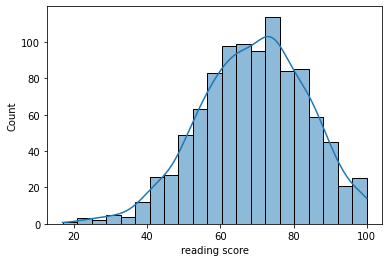

In [5]:
sns.histplot(x=data["reading score"],kde=True)
plt.show()

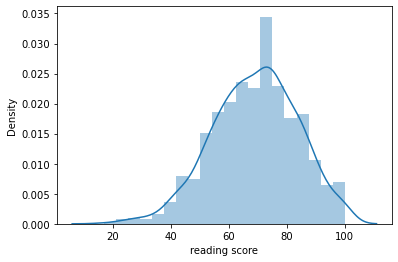

In [6]:
sns.distplot(data["reading score"],bins=20)
plt.show()

In [7]:
print(f'mean:',data["reading score"].mean())
print(f'median:',data["reading score"].median())
print(f'mode:',data["reading score"].mode()[0])

mean: 69.169
median: 70.0
mode: 72


In [8]:
data["reading score"].std()

14.600191937252216

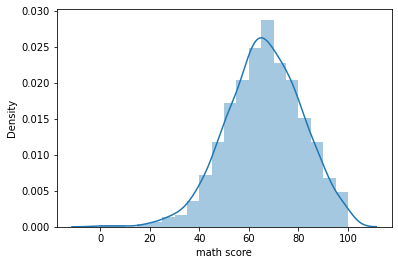

In [9]:
sns.distplot(data["math score"],bins=20)
plt.show()

In [10]:
print(f'mean:',data["math score"].mean())
print(f'median:',data["math score"].median())
print(f'mode:',data["math score"].mode()[0])

mean: 66.089
median: 66.0
mode: 65


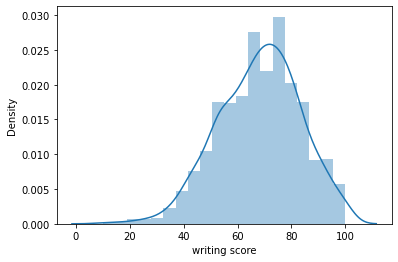

In [11]:
sns.distplot(data["writing score"],bins=20)
plt.show()

In [12]:
print(f'mean:',data["writing score"].mean())
print(f'median:',data["writing score"].median())
print(f'mode:',data["writing score"].mode()[0])

mean: 68.054
median: 69.0
mode: 74


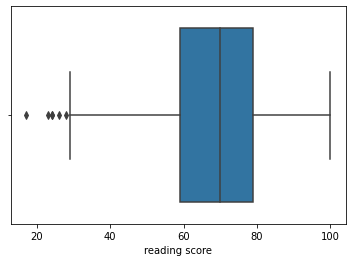

In [13]:
sns.boxplot(x=data["reading score"],orient="h",)
plt.show()

In [14]:
print("Mean",np.mean(data["reading score"]))
print("Median",np.median(data["reading score"]))

Mean 69.169
Median 70.0


In [15]:
Q1,Q3=np.quantile(data["reading score"], [0.25,0.75])

In [16]:
Q1,Q3=np.percentile(data["reading score"], [25,75])

In [17]:
IQR =  Q3-Q1

In [18]:
IQR

20.0

In [19]:
lower_bound = Q1-(1.5*IQR)
upper_bound = Q3+(1.5*IQR)

In [20]:
lower_bound,upper_bound

(29.0, 109.0)

In [21]:
def find_outliers_by_zscore(data):
    outliers = []
    mean = np.mean(data)
    sd = np.std(data)
    
    for i in data:
        z_score = (i-mean)/sd
        if(np.abs(z_score)>=3):
            outliers.append(i)
            
    return outliers

In [22]:
find_outliers_by_zscore(data["reading score"])

[17, 23, 24, 24]

In [23]:
find_outliers_by_zscore(data["math score"])

[18, 0, 19, 8]

Range

In [24]:
min_s=data["math score"].min()
max_s=data["math score"].max()

In [25]:
range_s = max_s-min_s

In [26]:
range_s

100

In [27]:
std=data["math score"].std()

In [28]:
lower_l = data["math score"].mean() - 2*std
upper_l = data["math score"].mean() + 2*std

In [29]:
lower_l,upper_l

(35.762839807981095, 96.4151601920189)

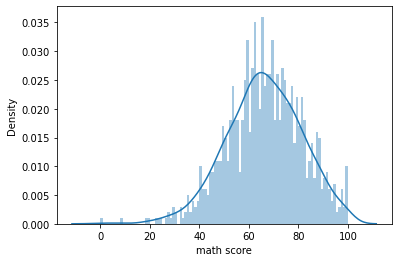

In [30]:
sns.distplot(data["math score"], bins=100)
plt.show()

In [31]:
np.percentile(data["math score"],[0.25,0.5,0.75])

array([18.4975, 22.995 , 26.4925])

In [32]:
np.quantile(data["math score"],[0.25,0.5,0.75])

array([57., 66., 77.])

In [33]:
data.cov()

,math score,reading score,writing score
math score,229.918998,180.998958,184.939133
reading score,180.998958,213.165605,211.786661
writing score,184.939133,211.786661,230.907992


In [34]:
data.corr('spearman')

,math score,reading score,writing score
math score,1.000000,0.804064,0.778339
reading score,0.804064,1.000000,0.948953
writing score,0.778339,0.948953,1.000000


In [35]:
data.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [36]:
data.corr('kendall')

,math score,reading score,writing score
math score,1.000000,0.617432,0.591067
reading score,0.617432,1.000000,0.820058
writing score,0.591067,0.820058,1.000000


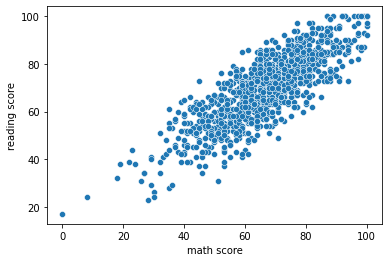

In [37]:
sns.scatterplot(x='math score',y='reading score',data=data)
plt.show()

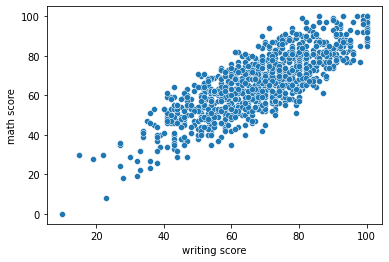

In [38]:
sns.scatterplot(x='writing score',y='math score',data=data)
plt.show()

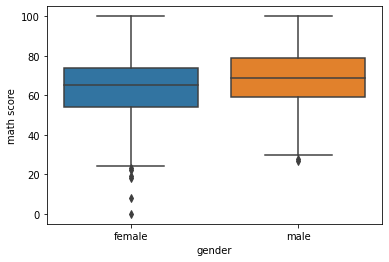

In [39]:
sns.boxplot(x="gender",y="math score",data=data )
plt.show()

Z-test, T-test, ANOVA

In [7]:
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_1samp,ttest_ind,ttest_rel,f_oneway

In [8]:
popu_mean = data["math score"].mean()
sample_math_score = data["math score"].sample(40)

<strong>One Sample Z Test</strong> <br/>
Ho -> No Diff b/w math score  of sample mean and population mean <br/>
h1 -> There is significat diff b/w them

In [9]:
z_test,p_value=ztest(x1=sample_math_score,value=popu_mean)
print("P Value:%.3f"%p_value)
if p_value<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

P Value:0.729
accept null hypothesis


Insight:
Sample is good enought as there is not diff bw sample mean and polulation mean

<strong>Two Sample Z Test</strong> <br/>
Ho -> No Diff b/w  math score of male and female <br/>
h1 -> There is significat diff b/w math score of male and female

In [65]:
math_score_male = data[data["gender"]=="male"]["math score"]
math_score_female = data[data["gender"]=="female"]["math score"]

In [66]:
z_test,pvalue=ztest(x1=math_score_male,x2=math_score_female)
print("pval:",pvalue)
if pvalue<0.05:
    print("Reject Null Hypothesis")
else:
    print("Accept Null Hypothesis")

pval: 7.31545037956675e-08
Reject Null Hypothesis


Insight:
Math score of male and female are not related.

<strong>One Sample T Test</strong> <br/>
Ho -> No Diff b/w reading score  of sample mean and population mean <br/>
h1 -> There is significat diff b/w them

In [70]:
popu_reading_mean = data["reading score"].mean()
sample_reading_score = data["reading score"].sample(40)

In [71]:
t_test,pval =  ttest_1samp(sample_reading_score,popu_reading_mean)

In [73]:
if pval<0.05:
    print("Reject Null Hypothesis")
else:
    print("Accept Null Hypothesis")

Accept Null Hypothesis


<strong>Two Sample T Test</strong> <br/>
Ho-> No relation BW reading and math score <br/>
H1-> There is relation BW reading and math score

In [96]:
reading_score = data["reading score"].sample(30)
math_score = data["math score"].sample(30)

In [97]:
t_test,pval =  ttest_ind(reading_score,math_score)

if pval<0.05:
    print("Reject Null Hypothesis")
else:
    print("Accept Null Hypothesis")

Accept Null Hypothesis


In [98]:
reading_score1 = data["reading score"].sample(30)
writing_score = data["writing score"].sample(30)
t_test,pval =  ttest_rel(reading_score1,writing_score)

if pval<0.05:
    print("Reject Null Hypothesis")
else:
    print("Accept Null Hypothesis")

Accept Null Hypothesis


<strong>One way ANOVA</strong>

In [16]:
df = pd.read_csv("loan_p.csv")

In [17]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Null Hypothesis: There is no significant difference between the mean Income among different groups of dependents. <br/>

Alternate Hypothesis: There is a significant difference between the mean Income among different groups of dependents.

In [25]:
df_anova = df[['ApplicantIncome','Dependents']]
grps = pd.unique(df.Dependents.values)
d_data = {grp:df_anova['ApplicantIncome'][df_anova.Dependents == grp] for grp in grps}
F, p = stats.f_oneway(d_data['0'], d_data['1'], d_data['2'],d_data['3+'])

In [27]:
if p<0.05:
    print("Reject Null Hypothesis")
else:
    print("Accept Null Hypothesis")

Reject Null Hypothesis


There is a significant difference between the mean Income among different groups of dependents.

<strong>One way ANOVA</strong>

In [32]:
a_stats,pval=f_oneway(data["reading score"].sample(30),data["writing score"].sample(30),data["math score"].sample(30))

In [33]:
if pval<0.05:
    print("Reject Null Hypothesis")
else:
    print("Accept Null Hypothesis")

Accept Null Hypothesis
